# Testando funções

In [1]:
# Mostra todos os resultados da célula, não apenas o último
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
InteractiveShell.ast_node_interactivity = "all"
# Truque para consertar caminhos do jupyter: variável __file__ não é definida em IPYTHON.
import project_path
from datetime import datetime
import os
import sys
import getpass
import pandas as pd
import numpy as np
from importlib import reload
import time
from astropy import units as u
from pytz import timezone

sys.path.append(os.path.abspath(os.path.join(os.path.split(os.getcwd())[0])))
sys.path.append(os.path.abspath(os.path.join(os.path.split(os.getcwd())[0], "radiotelescope")))

In [43]:
import radiotelescope
import radiotelescope.netutils as netutils
import radiotelescope.misc.multiprocess as multiprocess
import radiotelescope.misc.utils as utils
reload(radiotelescope)
reload(netutils)
reload(multiprocess)
reload(utils)

<module 'radiotelescope' from '/home/lbarosi/BAROSI/HOME/6000_PYTHONIA/2_Doing/radiotelescope/radiotelescope/__init__.py'>

<module 'radiotelescope.netutils.netutils' from '/home/lbarosi/BAROSI/HOME/6000_PYTHONIA/2_Doing/radiotelescope/radiotelescope/netutils/netutils.py'>

<module 'radiotelescope.misc.multiprocess' from '/home/lbarosi/BAROSI/HOME/6000_PYTHONIA/2_Doing/radiotelescope/radiotelescope/misc/multiprocess.py'>

<module 'radiotelescope.misc.utils' from '/home/lbarosi/BAROSI/HOME/6000_PYTHONIA/2_Doing/radiotelescope/radiotelescope/misc/utils.py'>

### Netutils - Todas as classes, métodos e funções testadas, documentadas e funcionando.

In [3]:
# Rodando comandos locais
netutils.run_command("ls -ls")
netutils.run_command("ls carai")

(b'total 64284\n   76 -rw-rw-r-- 1 lbarosi lbarosi    75914 set  7 15:49 03_LB_15052022_testando_GNURADIO-Copy1.ipynb\n   40 -rw-rw-r-- 1 lbarosi lbarosi    37474 set  7 15:52 03_LB_15052022_testando_GNURADIO.ipynb\n  120 -rw-rw-r-- 1 lbarosi lbarosi   119520 set  6 08:44 99_LB_27042022_testando_pedacos.ipynb\n    8 -rw-rw-r-- 1 lbarosi lbarosi     5893 set  6 09:17 99_testes.ipynb\n   20 -rw-rw-r-- 1 lbarosi lbarosi    17280 abr 11 09:25 csv.fit\n    4 -rw-rw-r-- 1 lbarosi lbarosi      152 abr  5 21:29 project_path.py\n    4 drwxrwxr-x 2 lbarosi lbarosi     4096 ago 31 16:50 __pycache__\n32004 -rw-rw-r-- 1 lbarosi lbarosi     2880 mai 14 18:40 SDR_01_20220514_184025_59.fit\n32004 -rw-rw-r-- 1 lbarosi lbarosi 32770880 mai 14 18:41 SDR_01_20220514_184158_59.fit\n    4 drwxr-xr-x 3 lbarosi workers     4096 ago 31 17:02 teste\n',
 b'')

(b'',
 "ls: não foi possível acessar 'carai': Arquivo ou diretório inexistente\n")

In [4]:
# Informações de rede
netutils.get_iface()
IP = netutils.get_ip(interface="WAN")
IP
netutils.get_MAC()
netutils.get_OS()
netutils.get_netmask(IP = IP)
netutils.get_subnet(IP = IP)

,interfaces,IP,type,private
2,wlxd8778bfe3520,192.168.15.49,WAN,True


'192.168.15.49'

'd8:77:8b:fe:35:20'

'Linux'

'255.255.255.0'

'192.168.15.49/24'

In [5]:
netutils.get_ip(interface="WAN")

'192.168.15.49'

In [33]:
# COnectando ao raspberry
df = netutils.get_raspberry(IP=IP)
df
rasp = netutils.report_raspberry(df)
rasp
netutils.get_remote_MAC(IP=rasp[0])
netutils.get_remote_OS(IP=rasp[0], user="bingo")

,host,addr,addrtype,vendor
2,1,192.168.15.81,ipv4,NaN
3,1,B8:27:EB:E8:A8:D4,mac,Raspberry Pi Foundation


Encontrados 1 dispositivos raspberry.
Rasberry 1 

Endereço IP: 192.168.15.81
Endereço MAC: B8:27:EB:E8:A8:D4


array(['192.168.15.81'], dtype=object)

'B8:27:EB:E8:A8:D4'

Comando executado com sucesso.
INPUT: python -c 'import platform; print(platform.system())' | OUTPUT: Linux



'Linux'

In [14]:
# Executando comandos no remoto
netutils.RemoteClient(host=rasp[0], user="bingo").deploy_local_key().run("ls")

Comando executado com sucesso.
INPUT: ls | OUTPUT: SDR

INPUT: ls | OUTPUT: teste



['SDR\n', 'teste\n']

### MISC - Todas as classes, métodos e funções testadas, documentadas e funcionando.

#### Multiprocess

In [15]:
multiprocess.run_progress(target=netutils.run_command, interval=2, command="sleep 10")

processo 54102 rodando.
processo 54102 rodando.
processo 54102 rodando.
processo 54102 rodando.
processo 54102 rodando.
processo 54102 rodando.
processo terminado em 12.012717 segundos.


In [16]:
multiprocess.run_detached(target=netutils.run_command, interval=10, command="sleep 20", monitor=True)

processo 54120 rodando.
processo 54120 rodando.
processo terminado em 20.020386 segundos.


In [17]:
multiprocess.run_detached(target=netutils.run_command, command="find ../../", monitor=False)

In [18]:
teste = multiprocess.run_daemon(thread=netutils.run_command, command="find ../../")
teste.pid

54129

#### utils

In [19]:
from datetime import datetime, timedelta
utils.parse_time("15m")
utils.parse_time("1h15m")
utils.parse_time(15 * u.s)
utils.parse_time(timedelta(days = 1))

900.0

4500.0

15.0

86400.0

In [20]:
utils.parse_time("15")

1.5e-08

### Controller - Todas as classes, métodos e funções testadas, documentadas e funcionando.

In [44]:
local_01 = radiotelescope.LinuxBox(
                    name="pergamon",
                    interface="WAN",
                    user="bingo", 
                    remote_port=22, 
                    remote_IP = "192.168.15.81", 
                    local_folder = "./teste/",
                    remote_folder = "~/SDR/"
                    ).get_info().connect()
local_01.remote.run(command="ls -la")
local_01.scan_LAN()
#local_01.sinc_files();

Verificando dados da máquina local:
IP: 192.168.15.49
MAC: d8:77:8b:fe:35:20
OS: Linux
Comando executado com sucesso.
INPUT: ls -la | OUTPUT: total 64

INPUT: ls -la | OUTPUT: drwxr-xr-x 8 bingo bingo 4096 Sep  6 07:43 .

INPUT: ls -la | OUTPUT: drwxr-xr-x 5 root  root  4096 May  6 16:19 ..

INPUT: ls -la | OUTPUT: drwxr-xr-x 3 bingo bingo 4096 May  7 20:25 .astropy

INPUT: ls -la | OUTPUT: -rw------- 1 bingo bingo 4851 Sep  6 08:26 .bash_history

INPUT: ls -la | OUTPUT: -rw-r--r-- 1 bingo bingo  220 May  6 15:33 .bash_logout

INPUT: ls -la | OUTPUT: -rw-r--r-- 1 bingo bingo 3523 May  6 15:33 .bashrc

INPUT: ls -la | OUTPUT: drwx------ 3 bingo bingo 4096 Sep  6 07:41 .config

INPUT: ls -la | OUTPUT: -rw-r--r-- 1 bingo bingo  462 May  8 22:47 .gr_fftw_wisdom

INPUT: ls -la | OUTPUT: -rw-r--r-- 1 bingo bingo    0 May  8 14:53 .gr_fftw_wisdom.lock

INPUT: ls -la | OUTPUT: drwxr-xr-x 3 bingo bingo 4096 May  7 19:24 .local

INPUT: ls -la | OUTPUT: -rw-r--r-- 1 bingo bingo 1670 May  6 15:33 

['total 64\n',
 'drwxr-xr-x 8 bingo bingo 4096 Sep  6 07:43 .\n',
 'drwxr-xr-x 5 root  root  4096 May  6 16:19 ..\n',
 'drwxr-xr-x 3 bingo bingo 4096 May  7 20:25 .astropy\n',
 '-rw------- 1 bingo bingo 4851 Sep  6 08:26 .bash_history\n',
 '-rw-r--r-- 1 bingo bingo  220 May  6 15:33 .bash_logout\n',
 '-rw-r--r-- 1 bingo bingo 3523 May  6 15:33 .bashrc\n',
 'drwx------ 3 bingo bingo 4096 Sep  6 07:41 .config\n',
 '-rw-r--r-- 1 bingo bingo  462 May  8 22:47 .gr_fftw_wisdom\n',
 '-rw-r--r-- 1 bingo bingo    0 May  8 14:53 .gr_fftw_wisdom.lock\n',
 'drwxr-xr-x 3 bingo bingo 4096 May  7 19:24 .local\n',
 '-rw-r--r-- 1 bingo bingo 1670 May  6 15:33 .mkshrc\n',
 '-rw-r--r-- 1 bingo bingo  807 May  6 15:33 .profile\n',
 '-rw------- 1 bingo bingo  834 May  8 14:53 .python_history\n',
 'drwxr-xr-x 3 bingo bingo 4096 Sep  7 16:13 SDR\n',
 'drwx------ 2 bingo bingo 4096 May 14 07:01 .ssh\n',
 'drwxr-xr-x 2 bingo bingo 4096 Sep  6 07:44 teste\n']

,IP,MAC
0,192.168.15.1,D8:C6:78:DA:8D:28
1,192.168.15.166,D4:F5:47:0D:43:99


In [23]:
local_01.sync_files()

Sincronizando dados: ~/SDR/ -> ./teste/.


In [24]:
local_01.sync_files(origin="local")

Sincronizando dados: ./teste/ -> ~/SDR/.


In [25]:
local_01.sync_files(origin="ba")

Você deve escolher `origin` local ou remote.


### Instrument - Todas as classes, métodos e funções testadas, documentadas e funcionando.

In [45]:
import pytz
lat= -7.211637 * u.deg;
lon= -35.908138 * u.deg;
elev= 553 * u.m
Alt= 84
Az=0
fwhm = 15
timezone = pytz.timezone("America/Recife")
minihorn = radiotelescope.Instrument(name='Uirapuru', lon=lon, lat=lat, elev=elev, timezone=timezone, 
                      verbose=True, Alt=Alt, Az=Az, fwhm = fwhm)

## Backend

### RTLSDR

Preparando Backend:
- Inicia Controlador
- Inicia Instrument
- Define dicionário de modos

#### Inicialização do Backend

In [46]:
# Definindo Controlador local ligado a raspberry remoto.
pergamon = radiotelescope.LinuxBox(
    name="pergamon", 
    interface="WAN", 
    user="bingo", 
    remote_port=22, 
    remote_IP = "192.168.15.81",
    local_folder = "../data/raw/RTLSDR/",
    remote_folder = "~/SDR/"
).get_info().connect()
# Definindo Instrumento
import pytz
lat= -7.211637 * u.deg;
lon= -35.908138 * u.deg;
elev= 553 * u.m
Alt= 84
Az=0
fwhm = 15
timezone = pytz.timezone("America/Recife")
minihorn = radiotelescope.Instrument(name='Cornetinha', lon=lon, lat=lat, elev=elev, timezone=timezone, 
                      verbose=True, Alt=Alt, Az=Az, fwhm = fwhm)
# Definindo Modos
modes = {"COLD":"01", "WARM":"02", "HOT":"03", "SKY":"59"}

Verificando dados da máquina local:
IP: 192.168.15.49
MAC: d8:77:8b:fe:35:20
OS: Linux


In [28]:
# Backend RTLSDR com dongle ligado em controlador local.
SDR_01 = radiotelescope.RTLSDRpowerBackend(controller=pergamon, instrument=minihorn, modes = modes, name="SDR_01");
SDR_01._get_filenames();
SDR_01.filenames

,files,mode
timestamps,,
2022-05-01 13:50:46+00:00,../data/raw/RTLSDR/SDR_01_20220501_135046_59.csv,59
2022-05-01 13:51:34+00:00,../data/raw/RTLSDR/SDR_01_20220501_135134_59.csv,59
2022-05-01 13:52:24+00:00,../data/raw/RTLSDR/SDR_01_20220501_135224_59.csv,59
2022-05-01 13:58:25+00:00,../data/raw/RTLSDR/SDR_01_20220501_135825_59.csv,59
2022-05-01 13:58:53+00:00,../data/raw/RTLSDR/SDR_01_20220501_135853_59.fit,59
2022-05-01 13:58:53+00:00,../data/raw/RTLSDR/SDR_01_20220501_135853_59.csv,59
2022-05-01 20:21:59+00:00,../data/raw/RTLSDR/SDR_01_20220501_202159_01.csv,01
2022-08-31 17:00:30+00:00,../data/raw/RTLSDR/SDR_01_20220831_170030_59.csv,59
2022-08-31 17:01:14+00:00,../data/raw/RTLSDR/SDR_01_20220831_170114_59.csv,59


#### Observação LOCAL

In [29]:
# Fazendo observação com dispositivo local
# Dicionário de parâmetros para observação
observe_dict = {"duration":"20s", 
                "band":["800M", "1200M"], 
                "bandwidth":"1M", 
                "gain":"50", 
                "integration":"1s",
                "mode":"59"}
# Nome de arquivo manualmente definido
NOW = datetime.now().strftime("%Y%m%d_%H%M%S")
mode = "59"
filename = SDR_01.controller.local_folder + SDR_01.name + "_" + NOW + "_" + mode + ".csv"
# Scan LOCAL com parâmetros manuais.
SDR_01.scan(filename=filename, **observe_dict)

rtl_power -f 800M:1200M:1M -g50 -i 1s -e 20s ../data/raw/RTLSDR/SDR_01_20220907_160835_59.csv


In [30]:
# Scan LOCAL em modo detached.
# time.sleep(2)
NOW = datetime.now().strftime("%Y%m%d_%H%M%S")
mode = "59"
filename = SDR_01.controller.local_folder + SDR_01.name + "_" + NOW + "_" + mode + ".csv"
SDR_01.scan_mp(filename=filename, **observe_dict, monitor=True, interval=20)

rtl_power -f 800M:1200M:1M -g50 -i 1s -e 20s ../data/raw/RTLSDR/SDR_01_20220907_160923_59.csv
processo 54409 rodando.
processo 54409 rodando.
processo terminado em 40.048802 segundos.


In [34]:
# Conectando ao remoto
SDR_01.connect()
SDR_01.is_connected
NOW = datetime.now().strftime("%Y%m%d_%H%M%S")
mode = "59"
filename = SDR_01.controller.remote_folder + SDR_01.name + "_" + NOW + "_" + mode + ".csv"
# Scan remoto manual
SDR_01.scan(filename=filename, **observe_dict, monitor=False)

Remoto já conectado em IP 192.168.15.81


True

rtl_power -f 800M:1200M:1M -g50 -i 1s -e 20s ~/SDR/SDR_01_20220907_161112_59.csv
Comando executado com sucesso.


In [35]:
# Manual
SDR_01.disconnect().observe(**observe_dict)
# Detached
SDR_01.disconnect().observe_mp(**observe_dict)

rtl_power -f 800M:1200M:1M -g50 -i 1s -e 20s ../data/raw/RTLSDR/SDR_01_20220907_161208_59.csv
rtl_power -f 800M:1200M:1M -g50 -i 1s -e 20s ../data/raw/RTLSDR/SDR_01_20220907_161208_59.csv


#### Observação no remoto

In [36]:
NOW = datetime.now().strftime("%Y%m%d_%H%M%S")
mode = "59"
filename = SDR_01.controller.remote_folder + SDR_01.name + "_" + NOW + "_" + mode + ".csv"
SDR_01.scan(filename=filename, **observe_dict, monitor=False)
# Scan remoto detached
SDR_01.scan_mp(filename=filename, **observe_dict, monitor=False)

rtl_power -f 800M:1200M:1M -g50 -i 1s -e 20s ~/SDR/SDR_01_20220907_161230_59.csv
rtl_power -f 800M:1200M:1M -g50 -i 1s -e 20s ~/SDR/SDR_01_20220907_161230_59.csv


In [37]:
SDR_01.connect().observe(**observe_dict)
SDR_01.connect().observe_mp(**observe_dict)

Remoto já conectado em IP 192.168.15.81
rtl_power -f 800M:1200M:1M -g50 -i 1s -e 20s ~/SDR/SDR_01_20220907_161302_59.csv
Comando executado com sucesso.
Remoto já conectado em IP 192.168.15.81
rtl_power -f 800M:1200M:1M -g50 -i 1s -e 20s ~/SDR/SDR_01_20220907_161328_59.csv


#### Leitura e manipulação de dados

In [57]:
SDR_01.connect()._get_filenames()

Remoto já conectado em IP 192.168.15.81


In [58]:
for file in SDR_01.filenames.files:
    print(file)

../data/raw/RTLSDR/SDR_01_20220501_135046_59.csv
../data/raw/RTLSDR/SDR_01_20220501_135134_59.csv
../data/raw/RTLSDR/SDR_01_20220501_135224_59.csv
../data/raw/RTLSDR/SDR_01_20220501_135825_59.csv
../data/raw/RTLSDR/SDR_01_20220501_135853_59.fit
../data/raw/RTLSDR/SDR_01_20220501_135853_59.csv
../data/raw/RTLSDR/SDR_01_20220501_202159_01.csv
../data/raw/RTLSDR/SDR_01_20220831_170030_59.csv
../data/raw/RTLSDR/SDR_01_20220831_170114_59.csv
../data/raw/RTLSDR/SDR_01_20220831_170141_59.csv
../data/raw/RTLSDR/SDR_01_20220907_160835_59.csv
../data/raw/RTLSDR/SDR_01_20220907_160923_59.csv


In [59]:
SDR_01.load_measurement(extension="csv")

/home/lbarosi/BAROSI/HOME/6000_PYTHONIA/2_Doing/radiotelescope/radiotelescope/backend/rtlsdrbackend.py:99: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  result = df_data.pivot_table(values='Flux_dB',


,800.0,801.0,802.0,803.0,804.0,805.0,806.0,807.0,808.0,809.0,...,1691.0,1692.0,1693.0,1694.0,1695.0,1696.0,1697.0,1698.0,1699.0,1700.0
2022-05-01 13:51:14,-8.850,-8.910,-8.110,-9.410,-11.185,-8.205,3.515,2.840,-8.095,-10.475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 13:52:01,-7.270,-6.970,-6.985,-9.500,-11.355,-8.405,3.205,2.500,-8.335,-10.735,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 17:52:50,-5.620,-4.205,-4.455,-8.365,-10.250,-7.670,3.345,2.900,-7.815,-10.375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 17:58:51,-8.130,-7.630,-7.160,-8.475,-9.550,-7.095,3.625,3.140,-7.120,-9.700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01 17:59:19,-9.320,-9.220,-8.380,-9.145,-10.535,-8.295,2.400,1.955,-8.105,-10.270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-02 00:38:07,-6.965,-6.295,-8.030,-10.230,-11.530,-9.435,1.210,0.710,-9.315,-11.445,...,0.95,1.205,2.615,0.875,2.13,6.31,6.305,5.075,4.645,3.51
2022-08-31 17:00:57,1.800,0.880,-1.200,-7.135,-11.695,-9.340,1.690,1.110,-9.265,-11.325,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-31 17:01:41,-0.160,0.215,-1.595,-7.815,-11.620,-9.290,1.820,1.270,-9.170,-11.245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-31 17:02:08,0.720,0.460,-2.315,-8.720,-12.320,-9.935,1.625,1.210,-9.735,-11.870,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-07 16:09:03,-9.680,-9.575,-8.400,-9.495,-11.320,-8.055,4.185,3.775,-7.460,-10.425,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
SDR_01.connect().save_measurement()

Remoto já conectado em IP 192.168.15.81
Remoto já conectado em IP 192.168.15.81
Sincronizando dados: ~/SDR/ -> ../data/raw/RTLSDR/.


In [61]:
file = SDR_01._get_filenames().filenames.files.iloc[-1]
SDR_01.csv2fit(filename=file)
SDR_01._get_filenames()
SDR_01.load_measurement(extension="fit")

,800.0,801.0,802.0,803.0,804.0,805.0,806.0,807.0,808.0,809.0,...,1191.0,1192.0,1193.0,1194.0,1195.0,1196.0,1197.0,1198.0,1199.0,1200.0
2022-05-01 17:59:19,-9.32,-9.220,-8.380,-9.145,-10.535,-8.295,2.400,1.955,-8.105,-10.27,...,-18.185,-17.825,-18.250,-17.265,-8.475,-7.475,-15.535,-16.76,-16.155,-15.07
2022-09-07 16:13:55,3.90,3.065,0.975,-5.380,-10.250,-8.055,3.125,2.720,-7.870,-10.11,...,-18.860,-18.530,-18.815,-18.160,-8.560,-7.030,-16.470,-19.50,-19.315,-17.58


In [62]:
SDR_01.connect().calibrate()

Remoto já conectado em IP 192.168.15.81
rtl_power -f 50M:1700M:1M -g50 -i 15m -e 15m ~/SDR/SDR_01_20220907_162904_01.csv


In [63]:
SDR_01.connect().save_measurement()
filenames = SDR_01._get_filenames().filenames

Remoto já conectado em IP 192.168.15.81
Remoto já conectado em IP 192.168.15.81
Sincronizando dados: ~/SDR/ -> ../data/raw/RTLSDR/.


/home/lbarosi/BAROSI/HOME/6000_PYTHONIA/2_Doing/radiotelescope/radiotelescope/backend/rtlsdrbackend.py:99: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  result = df_data.pivot_table(values='Flux_dB',


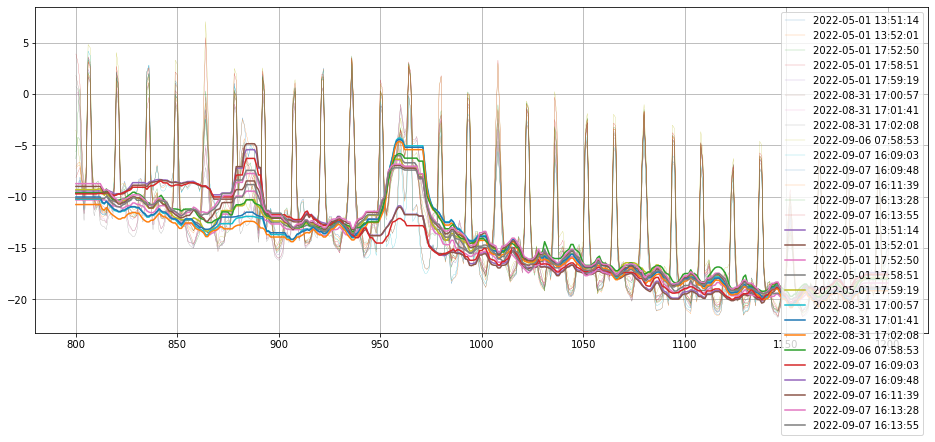

In [65]:
import matplotlib.pyplot as plt
df = SDR_01.load_measurement(mode="59")
df_filt = df.T.rolling(20, center = True).median().fillna(method='bfill').fillna(method='ffill')
fig, ax = plt.subplots(figsize=(16,6))
df.T.plot(ax=ax, linewidth=.2)
df_filt.plot(ax=ax)
ax.grid()
plt.show();

### Callisto

In [ ]:
meas_mode = ["overview", "fit"]
mode = { "SKY":"59", "COLD":"01", "WARM":"02" "HOT":"03"}
observe_dict = { "duration": "30m", mode = "SKY", "measurement" = "overview"}

### GNURadio

#### Inicialização do Backend

In [ ]:
# Definindo Controlador local ligado a raspberry remoto.
pergamon = radiotelescope.LinuxBox(
    name="pergamon", 
    interface="WAN", 
    user="bingo", 
    remote_port=22, 
    remote_IP = "192.168.15.83",
    local_folder = "../data/raw/GNURADIO/",
    remote_folder = "~/SDR/"
).get_info().connect()
# Definindo Instrumento
import pytz
lat= -7.211637 * u.deg;
lon= -35.908138 * u.deg;
elev= 553 * u.m
Alt= 84
Az=0
fwhm = 15
timezone = pytz.timezone("America/Recife")
minihorn = radiotelescope.Instrument(name='Cornetinha', lon=lon, lat=lat, elev=elev, timezone=timezone, 
                      verbose=True, Alt=Alt, Az=Az, fwhm = fwhm)
# Definindo Modos
modes = {"COLD":"01", "WARM":"02", "HOT":"03", "SKY":"59"}

In [ ]:
# Backend RTLSDR com dongle ligado em controlador local.
SDR_01 = radiotelescope.GNURadioBackend(controller=pergamon, instrument=minihorn, modes = modes, name="SDR_01");
SDR_01._get_filenames();
SDR_01.filenames

#### Observação Local

In [ ]:
# Dicionário de parâmetros para observação
rtlstring = "rtl_tcp=" + pergamon.remote_IP + ":1234"
GNUSCRIPT = "../radiotelescope/GNURadio/GNUController.py"
observe_dict = {"rtlsdr":rtlstring,
                "GNUScript":GNUSCRIPT,
                "folder":pergamon.local_folder,
                "mode": "SKY",
                "channels":4096,
                "bandwidth":2048e6,
                "gain":50,
                "freq":1240,
                "n_integration":100,
                "n_samples": 1000,
                "duration": "300s",
                "csv":True,
                "fit":True}

In [ ]:
command = SDR_01.scan_command(**observe_dict)

In [ ]:
command

In [ ]:
SDR_01.start_tcp()
SDR_01.controller.run(command = command)

In [ ]:
command

In [ ]:
SDR_01.connect()
SDR_01.observe(**observe_dict)

In [ ]:

RTLGLOBAL

In [ ]:
#Fazendo observação com dispositivo local
# Dicionário de parâmetros para observação
observe_dict = {"duration":"20s", 
                "band":["800M", "1200M"], 
                "bandwidth":"1M", 
                "gain":"50", 
                "integration":"1s",
                "mode":"59"}
# Nome de arquivo manualmente definido
NOW = datetime.now().strftime("%Y%m%d_%H%M%S")
mode = "59"
filename = SDR_01.controller.local_folder + SDR_01.name + "_" + NOW + "_" + mode + ".csv"
# Scan LOCAL com parâmetros manuais.
SDR_01.scan(filename=filename, **observe_dict)
# Scan LOCAL em modo detached.
time.sleep(2)
NOW = datetime.now().strftime("%Y%m%d_%H%M%S")
mode = "59"
filename = SDR_01.controller.local_folder + SDR_01.name + "_" + NOW + "_" + mode + ".csv"
SDR_01.scan_mp(filename=filename, **observe_dict, monitor=True, interval=20)

In [ ]:
Conectando ao remoto
SDR_01.connect()
SDR_01.is_connected
NOW = datetime.now().strftime("%Y%m%d_%H%M%S")
mode = "59"
filename = SDR_01.controller.remote_folder + SDR_01.name + "_" + NOW + "_" + mode + ".csv"
# Scan remoto manual
SDR_01.scan(filename=filename, **observe_dict, monitor=False)

In [ ]:
# Manual
SDR_01.disconnect().observe(**observe_dict)
# Detached
SDR_01.disconnect().observe_mp(**observe_dict)

#### Observação Remota

#### Leitura e Manipulação de Dados